In [11]:
import pandas as pd 
import numpy as np  
from scipy import stats
import matplotlib.pyplot as plt


def AdjustTestStatistic(n, D):
    return (np.sqrt(n) + .12 + (.11/np.sqrt(n))) * D


df = pd.read_excel('Experiment1.xlsx', index_col=None)
list(df)

['Red Total Attrition',
 'Red Units Destroyed',
 'Blue Total Attrition',
 'Blue Total CSS',
 'Blue Units Destroyed',
 'Blue Final Effectiveness',
 'Mission Accomplished',
 'Total Steps',
 'RedTgt',
 'BlueCom']

RED Targeting Effectiveness =  0.1
Adjusted Test Statistic  1.0161115711777335
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



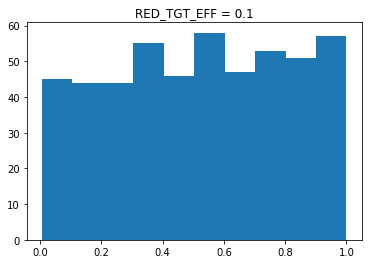

RED Targeting Effectiveness =  0.2
Adjusted Test Statistic  0.8456296927833921
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



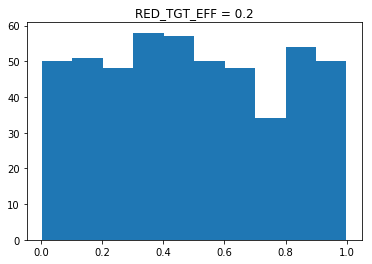

RED Targeting Effectiveness =  0.3
Adjusted Test Statistic  1.5079821619054885
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Reject H0



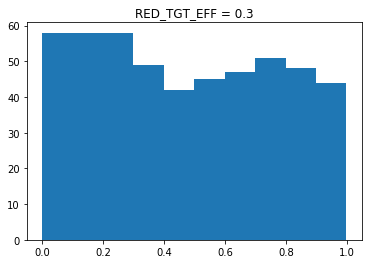

RED Targeting Effectiveness =  0.4
Adjusted Test Statistic  0.6976539508241497
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



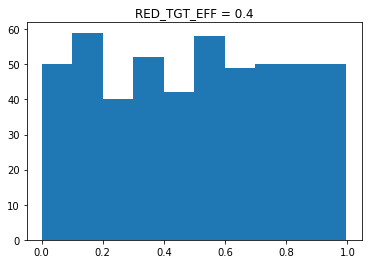

RED Targeting Effectiveness =  0.5
Adjusted Test Statistic  0.5109889710345572
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



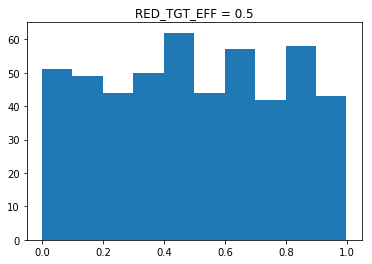

RED Targeting Effectiveness =  0.6000000000000001
Adjusted Test Statistic  1.2981257379784843
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



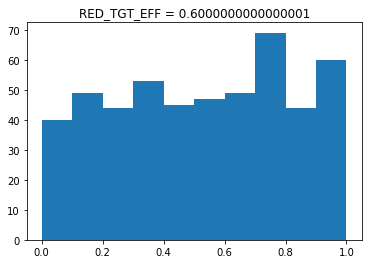

RED Targeting Effectiveness =  0.7000000000000001
Adjusted Test Statistic  0.5832198821913424
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



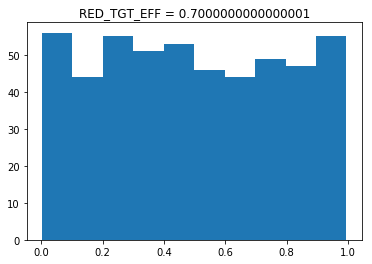

RED Targeting Effectiveness =  0.8
Adjusted Test Statistic  0.6629786326617945
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



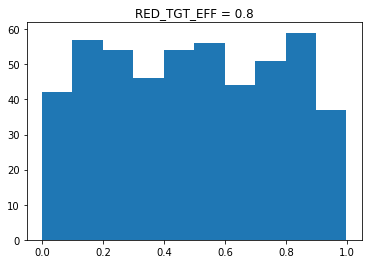

RED Targeting Effectiveness =  0.9
Adjusted Test Statistic  1.1785085591466011
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



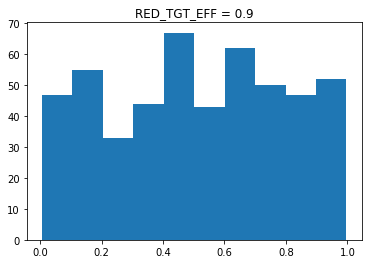

RED Targeting Effectiveness =  1.0
Adjusted Test Statistic  1.1454138582449005
KSTest Test for Standard Uniform Distribution at Alpha.05 -  Failed to Reject H0



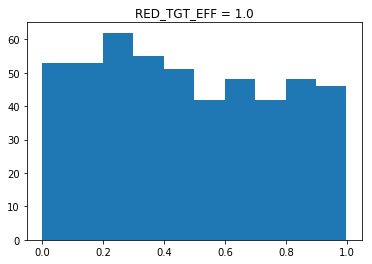

In [10]:
# Conduct K-S Tests for each sample (n=500) to ensure standard uniform distribution of Blue Com Risk 

for i in range(1, 11, 1):
    if i == 3:RED_TGT_EFF = .3
    else:    RED_TGT_EFF = i *.1
        
    df2 = df.loc[df.RedTgt==RED_TGT_EFF]

    bluecom = np.array(df2.BlueCom)
    Dn = stats.kstest(bluecom, 'uniform')[0] #scipy unniform distribution defaults to standard U(0,1)
    AdjD = AdjustTestStatistic(500, Dn)
    print("RED Targeting Effectiveness = ", RED_TGT_EFF)
    print("Adjusted Test Statistic ", AdjD)
    KSTest = "Failed to Reject H0" if AdjD <= 1.358 else "Reject H0"
    print("KSTest Test for Standard Uniform Distribution at Alpha.05 - ", KSTest)
    print("")
    plt.hist(bluecom)
    plt.title("RED_TGT_EFF = " + str(RED_TGT_EFF))
    plt.show()


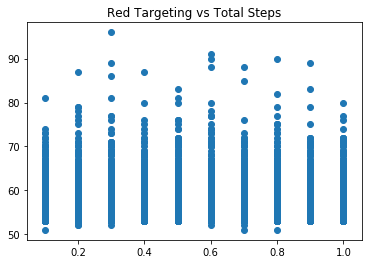

(Pearson) Correclation Coef =  0.0007986346142643681



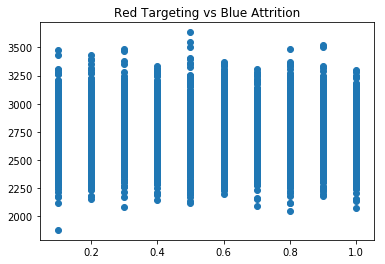

(Pearson) Correclation Coef =  -0.009471222811023076



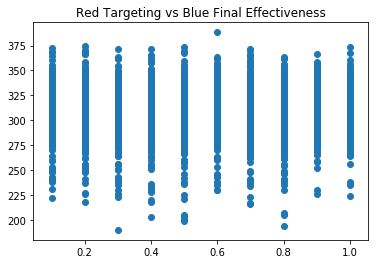

(Pearson) Correclation Coef =  0.01858087829536106


In [28]:
#conduct scatter plot analysis of Red Targeting Effectiveness to KPIs

plt.scatter(df.RedTgt, df['Total Steps'])
plt.title("Red Targeting vs Total Steps")
plt.show()
print("(Pearson) Correclation Coef = ",df.RedTgt.corr(df['Total Steps']))
print("")

plt.scatter(df.RedTgt, df['Blue Total Attrition'])
plt.title("Red Targeting vs Blue Attrition")
plt.show()
print("(Pearson) Correclation Coef = ",df.RedTgt.corr(df['Blue Total Attrition']))
print("")

plt.scatter(df.RedTgt, df['Blue Final Effectiveness'])
plt.title("Red Targeting vs Blue Final Effectiveness")
plt.show()
print("(Pearson) Correclation Coef = ",df.RedTgt.corr(df['Blue Final Effectiveness']))


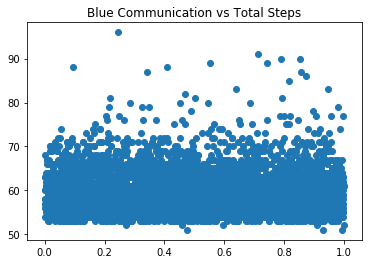

(Pearson) Correclation Coef =  -0.0016514861511249981



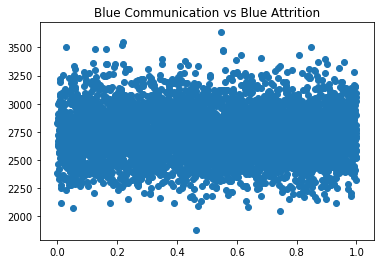

(Pearson) Correclation Coef =  -0.016642733012641676



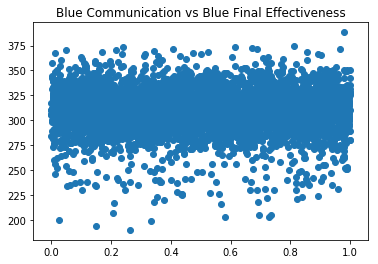

(Pearson) Correclation Coef =  -0.016587908956367605



In [29]:
#conduct scatter plot analysis of Red Targeting Effectiveness to KPIs

plt.scatter(df.BlueCom, df['Total Steps'])
plt.title("Blue Communication vs Total Steps")
plt.show()
print("(Pearson) Correclation Coef = ",df.BlueCom.corr(df['Total Steps']))
print("")

plt.scatter(df.BlueCom, df['Blue Total Attrition'])
plt.title("Blue Communication vs Blue Attrition")
plt.show()
print("(Pearson) Correclation Coef = ",df.BlueCom.corr(df['Blue Total Attrition']))
print("")

plt.scatter(df.BlueCom, df['Blue Final Effectiveness'])
plt.title("Blue Communication vs Blue Final Effectiveness")
plt.show()
print("(Pearson) Correclation Coef = ",df.BlueCom.corr(df['Blue Final Effectiveness']))
print("")
